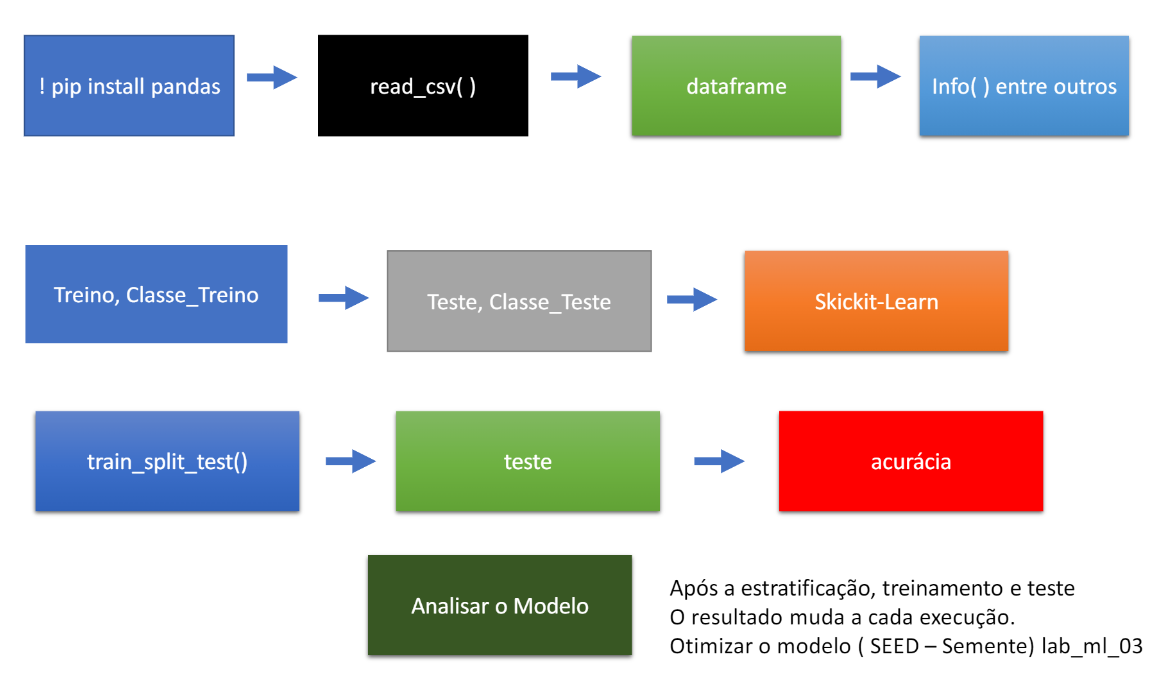

In [3]:
url = "https://raw.githubusercontent.com/romulosilvestre/semanamachinelearning-datasets/main/tracking.csv"


In [4]:
! pip install pandas

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(url)

In [7]:
df

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
94,0,0,1,0,0
95,1,1,1,1,0
96,0,0,1,0,0
97,0,1,0,0,0


In [25]:
import pandas as pd

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.metrics import classification_report, accuracy_score

In [9]:
# Etapa 1: Carregar o conjunto de dados
url = "https://raw.githubusercontent.com/romulosilvestre/semanamachinelearning-datasets/main/tracking.csv"
df = pd.read_csv(url)


In [19]:
# Etapa 2: Visão geral dos dados
print(df.head())  # Primeiras 5 linhas


   inicial  palestras  contato  comprou  patrocinio
0        1          1        0        0           0
1        1          1        0        0           0
2        1          1        0        0           0
3        1          1        0        0           0
4        1          1        0        0           0


In [20]:
# Informações do conjunto de dados e valores ausentes
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   inicial     99 non-null     int64
 1   palestras   99 non-null     int64
 2   contato     99 non-null     int64
 3   comprou     99 non-null     int64
 4   patrocinio  99 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB
None


In [21]:
# Estatísticas básicas
print(df.describe())  

         inicial  palestras    contato    comprou  patrocinio
count  99.000000  99.000000  99.000000  99.000000   99.000000
mean    0.535354   0.404040   0.626263   0.333333    0.050505
std     0.501287   0.493203   0.486257   0.473804    0.220099
min     0.000000   0.000000   0.000000   0.000000    0.000000
25%     0.000000   0.000000   0.000000   0.000000    0.000000
50%     1.000000   0.000000   1.000000   0.000000    0.000000
75%     1.000000   1.000000   1.000000   1.000000    0.000000
max     1.000000   1.000000   1.000000   1.000000    1.000000


In [12]:
# Etapa 3: Dividir os dados em variáveis independentes (X) e alvo (y)
# Aqui estamos considerando que o comportamento de clicar em páginas (inicial, palestras, contato) influencia a compra
X = df[['inicial', 'palestras', 'contato']]  # Variáveis independentes (comportamento no site)
y = df['comprou']  # Variável alvo (se comprou ou não)

In [13]:
# Etapa 4: Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Etapa 5: Treinar um classificador Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Etapa 6: Fazer previsões
y_pred = modelo.predict(X_test)

In [16]:
# Etapa 7: Avaliar o modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia * 100:.2f}%")
print(classification_report(y_test, y_pred))

Acurácia: 93.33%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [17]:
# Extra: Visualizar a importância das variáveis
importances = modelo.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"Importância da variável {feature}: {importance:.4f}")

Importância da variável inicial: 0.6386
Importância da variável palestras: 0.1624
Importância da variável contato: 0.1989
